In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [ ]:
%%R

install.packages("ggalt")

In [2]:
%%R

require('ggplot2')
require('readr')
require('dplyr')
require('tidyr')

Lade nötiges Paket: ggplot2
Lade nötiges Paket: readr
Lade nötiges Paket: dplyr

Attache Paket: ‘dplyr’

Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag

Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union

Lade nötiges Paket: tidyr


In [177]:
%%R -w 1000 -h 600

df <- read_csv('output.csv')
df

Rows: 36 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): month, category
dbl (1): average_value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 36 × 3
   month category average_value
   <chr> <chr>            <dbl>
 1 Jan.  bakery            2.1 
 2 Feb.  bakery            1.95
 3 Mar.  bakery            2.21
 4 Apr.  bakery            2.03
 5 May   bakery            2.09
 6 Jun.  bakery            2.1 
 7 Jul.  bakery            2.09
 8 Aug.  bakery            2.17
 9 Sep.  bakery            2.12
10 Oct.  bakery            2.25
# ℹ 26 more rows
# ℹ Use `print(n = ...)` to see more rows


In [178]:
%%R

df$month <- factor(df$month, levels = c(
  "Jan.", "Dec.", "Nov.", "Oct.", "Sep.", "Aug.", "Jul.", 
"Jun.", "May", "Apr.", "Mar.", "Feb."
))

In [179]:
%%R 

df$category <- factor(df$category, levels = c( "rest", "candy", "bakery"))

In [180]:
%%R 


require('stringr')

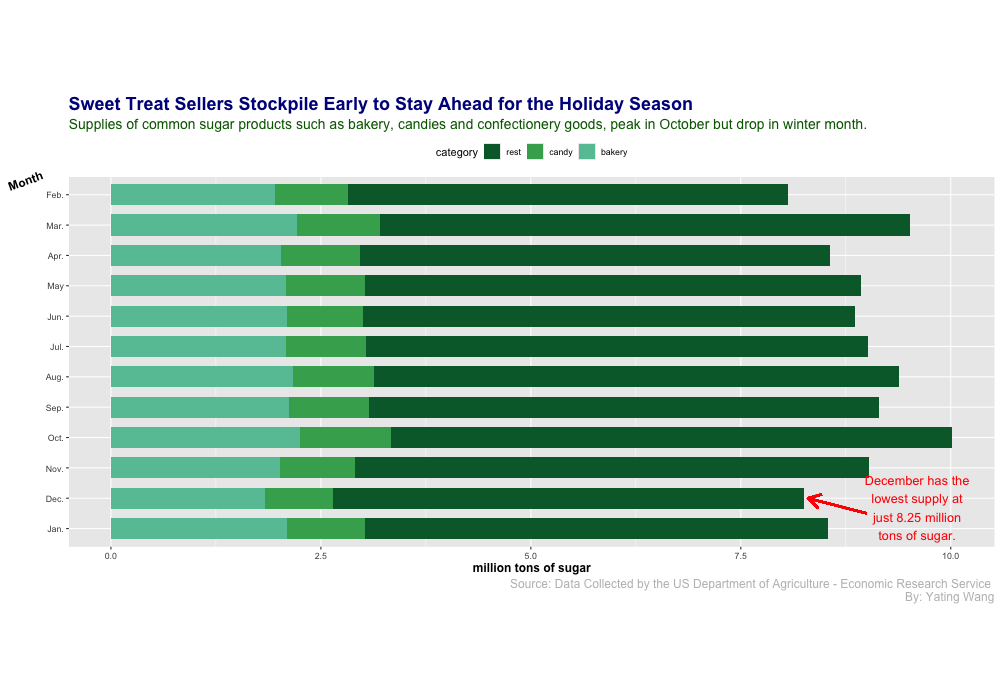

In [191]:
%%R -w 1000 -h 700

ggplot(df) +
    aes(x = average_value, y = month, fill = category) +
    geom_col(position = "stack", width = 0.7) +  
    scale_fill_manual(values = c("bakery" = "#66c2a5", "candy" = "#41ab5d", "rest" = "#006837")) +
    labs(
        title = "Sweet Treat Sellers Stockpile Early to Stay Ahead for the Holiday Season",
        subtitle = "Supplies of common sugar products such as bakery, candies and confectionery goods, peak in October but drop in winter month.",
        x = "million tons of sugar",
        y = "Month",
        caption = "Source: Data Collected by the US Department of Agriculture - Economic Research Service \nBy: Yating Wang",
        fill = "category"
    ) +
    theme(
        plot.title = element_text(face = "bold", size = 18, color = "darkblue"),
        plot.subtitle = element_text(size = 14, color = "darkgreen"),
        plot.caption = element_text(size = 12, color = "gray"),  # Added missing comma
        axis.title.x = element_text(face = "bold", size = 12,),
        axis.title.y = element_text(face = "bold", size = 12, angle = 20),
        legend.position = "top",
        aspect.ratio = 0.4
    ) +
    annotate("text", x = 9.6, y = 1.7, 
             label = str_wrap("December has the lowest supply at just 8.25 million tons of sugar.", width = 20), 
             color = "red", size = 4.5) +
    geom_segment(
        aes(x = 9, xend = 8.3, y = 1.5, yend = 2), 
        arrow = arrow(length = unit(0.2, "inches")), 
        color = "red", 
        linewidth = 1
    )
